In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
import torch

# Initialize MTCNN for face detection
mtcnn = MTCNN()

# Load pre-trained Inception ResNet model
resnet = InceptionResnetV1(pretrained='casia-webface').eval()

# Load two face images to be verified
img1 = Image.open('../artifacts/test/1.jpg')
img2 = Image.open('../artifacts/test/2.jpg')
img3 = Image.open('../artifacts/test/3.jpg')

# Detect and align faces
aligned1 = mtcnn(img1)
aligned2 = mtcnn(img2)
aligned3 = mtcnn(img3)

# Ensure both images have detected faces
if aligned1 is not None and aligned2 is not None:
    aligned1 = aligned1.unsqueeze(0)  # Add batch dimension (1, C, H, W)
    aligned2 = aligned2.unsqueeze(0)  # Add batch dimension (1, C, H, W)
    aligned3 = aligned3.unsqueeze(0)

    # Extract embeddings
    embeddings1 = resnet(aligned1).detach()
    embeddings2 = resnet(aligned2).detach()
    embeddings3 = resnet(aligned3).detach()
    
    # Calculate the Euclidean distance between embeddings
    distance = torch.norm(embeddings1 - embeddings3).item()

    # Set a threshold for verification
    threshold = 1.0  # Adjust as needed
    if distance < threshold:
        print("Same person")
    else:
        print("Different persons")
else:
    print("Face not detected in one or both images.")


c:\Users\m477a\Anaconda3\envs\mlops2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Different persons


In [3]:
aligned1 = mtcnn(img1)

In [4]:
type(aligned1)

torch.Tensor

In [5]:
aligned1.shape

torch.Size([3, 160, 160])

In [12]:
aligned2.shape

torch.Size([1, 3, 160, 160])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.95703125..0.99609375].


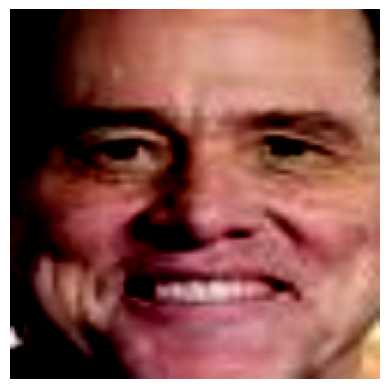

In [13]:
import torch
import matplotlib.pyplot as plt

# Create a sample tensor (or use your own)
image_tensor = aligned1  # Simulating an RGB image

# Convert (C, H, W) -> (H, W, C) and move to NumPy
image_np = image_tensor.permute(1, 2, 0).numpy()

# Display the image
plt.imshow(image_np)
plt.axis("off")  # Hide axes
plt.show()


In [6]:
aligned1.unsqueeze(0).shape

torch.Size([1, 3, 160, 160])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.95703125..0.99609375].


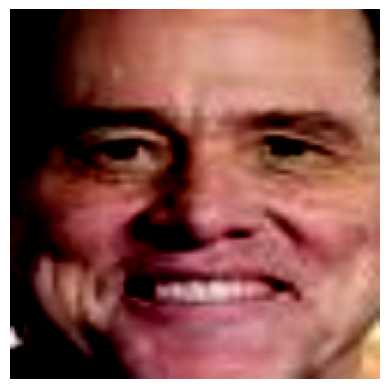

In [14]:
# Simulated batch image tensor (1 image, 3 channels, 160x160)
image_tensor = aligned1.unsqueeze(0)  

# Remove batch dimension and rearrange (C, H, W) -> (H, W, C)
image_np = image_tensor.squeeze(0).permute(1, 2, 0).numpy()

# Display the image
plt.imshow(image_np)
plt.axis("off")
plt.show()

In [7]:
type(embeddings1)

torch.Tensor

In [9]:
embeddings1.shape

torch.Size([1, 512])